#Tarea 1 EL4203

###Alumno: Daniel Agüero C.

#Preguntas Teóricas

##¿Qué es un paradigma de programación?
Es un modelo que define cómo estructurar y desarrollar el código, como la programación orientada a objetos.

##¿En qué se basa la programación orientada a objetos?
Se basa en la creación de objetos, que son instancias de clases, las cuales serían analogas a un contenedor que almacena funciones, datos o comportamientos que se relacionan entre sí. Se usan conceptos como herencia y polimorfismo para la reutilización y organización del código.

##¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación big O?
La recursividad implica que una función se llama a sí misma, mientras que la iteración usa bucles para repetir un bloque de código. La recursividad puede ser más costosa en memoria debido a las llamadas anidadas.

##Explicar la diferencia de rendimiento entre O(1) y O(n).
O(1) significa que el tiempo de ejecución es constante y no depende del tamaño del input, mientras que en O(n) crece linealmente con el tamaño del input.

##¿Cómo se calcula el orden en un programa que funciona por etapas?
Se suman las complejidades de cada etapa, tomando la mayor como la complejidad total del programa.

##¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Se usa la ecuación de recurrencia para describir el tiempo en función del tamaño del problema y se resuelve para obtener la complejidad.

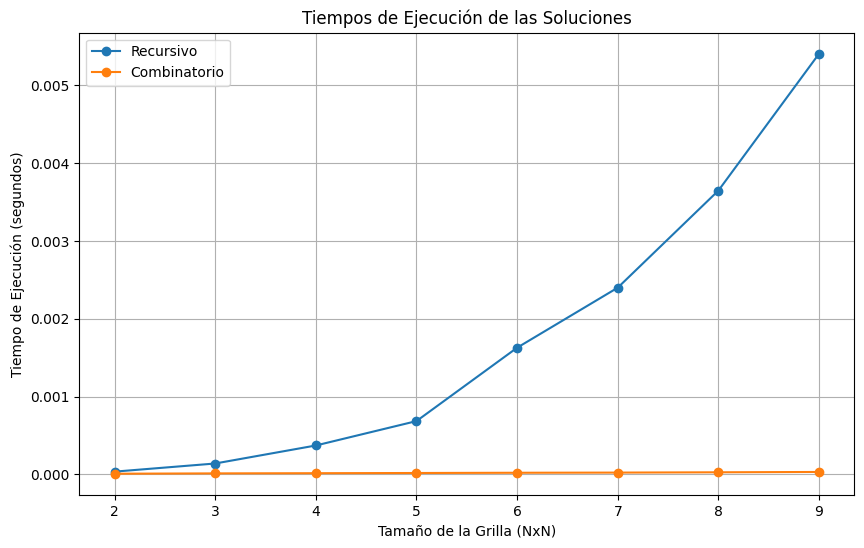

In [2]:
import time
import matplotlib.pyplot as plt

# Decorador para medir y almacenar el tiempo de ejecución
def medir_y_almacenar_tiempo(func):
    tiempos_ejecucion = []

    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        tiempo_ejecucion = fin - inicio
        tiempos_ejecucion.append(tiempo_ejecucion)
        wrapper.tiempos_ejecucion = tiempos_ejecucion
        return resultado

    wrapper.tiempos_ejecucion = tiempos_ejecucion
    return wrapper

# Clase que contiene las soluciones para contar caminos en la PCB,
# utilizando un metodo recursivo y otro combinatorial
class caminosPCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.memo = {}

    # Método para contar caminos usando recursión
    @medir_y_almacenar_tiempo
    def contar_caminos_recursivo(self, x=0, y=0):
        if x == self.N - 1 and y == self.M - 1:
            return 1
        # Condicion por si se sale de los límites de la grilla
        if x >= self.N or y >= self.M:
            return 0
        # Verificamos si el resultado ya fue calculado
        if (x, y) in self.memo:
            return self.memo[(x, y)]

        # Calculamos el número de caminos recursivamente
        caminos = self.contar_caminos_recursivo(x, y + 1) + self.contar_caminos_recursivo(x + 1, y)
        # Almacenamos el resultado en el diccionario de memorización
        self.memo[(x, y)] = caminos
        return caminos

    # Método para contar caminos usando combinatoria
    @medir_y_almacenar_tiempo
    def contar_caminos_combinatorio(self):
        # Calculamos el número total de movimientos requeridos
        total_movimientos = (self.N - 1) + (self.M - 1)
        # Movimientos hacia la derecha
        movimientos_derecha = self.M - 1
        # Utilizamos combinatoria para encontrar el número de caminos
        return self.combinatorio(total_movimientos, movimientos_derecha)

    # Función auxiliar para calcular combinaciones
    def combinatorio(self, n, k):
        from math import factorial
        return factorial(n) // (factorial(k) * factorial(n - k))

    # Método para ejecutar la solución deseada
    def contar_caminos(self, metodo):
        if metodo == 'recursivo':
            return self.contar_caminos_recursivo()
        elif metodo == 'combinatorio':
            return self.contar_caminos_combinatorio()
        else:
            raise ValueError("Método no reconocido.")

# Función para generar gráficos comparando tiempos de ejecución
def graficar_tiempos():
    tamanos = range(2, 10)
    tiempos_recursivo = []
    tiempos_combinatorio = []

    # Bucle para probar distintos tamaños de grilla
    for tamano in tamanos:
        pcb = caminosPCB(tamano, tamano)

        pcb.contar_caminos('recursivo')
        tiempos_recursivo.append(sum(pcb.contar_caminos_recursivo.tiempos_ejecucion))

        pcb = caminosPCB(tamano, tamano)

        pcb.contar_caminos('combinatorio')
        tiempos_combinatorio.append(sum(pcb.contar_caminos_combinatorio.tiempos_ejecucion))

    # Creamos el gráfico de comparación
    plt.figure(figsize=(10, 6))
    plt.plot(tamanos, tiempos_recursivo, label='Recursivo', marker='o')
    plt.plot(tamanos, tiempos_combinatorio, label='Combinatorio', marker='o')
    plt.xlabel('Tamaño de la Grilla (NxN)')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.title('Tiempos de Ejecución de las Soluciones')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutamos y graficamos los tiempos de ejecución
graficar_tiempos()
